In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
data = pd.read_csv('https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/Chapter_2/police.csv')

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [204]:
data.shape

(91741, 15)

In [205]:
data.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [206]:
data.dropna(axis=1, inplace=True, how='all')
data.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [207]:
data['stop_date'] = pd.to_datetime(data['stop_date'], format='mixed')
data['stop_time'] = pd.to_datetime(data['stop_time'], format='mixed').dt.time

In [208]:
for x in data:
    if(str(data[x].dtype)=="float64"):
        mean = data[x].mean()
        data[x] = data[x].fillna(mean)
        
data.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw            0
driver_age                0
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [209]:
data.dropna(inplace=True)
data.isna().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [210]:
data.duplicated().sum()

9

In [211]:
data.drop_duplicates(inplace=True)

In [212]:
data.duplicated().sum()

0

In [213]:
data.shape

(3187, 14)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3187 entries, 24 to 91708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           3187 non-null   datetime64[ns]
 1   stop_time           3187 non-null   object        
 2   driver_gender       3187 non-null   object        
 3   driver_age_raw      3187 non-null   float64       
 4   driver_age          3187 non-null   float64       
 5   driver_race         3187 non-null   object        
 6   violation_raw       3187 non-null   object        
 7   violation           3187 non-null   object        
 8   search_conducted    3187 non-null   bool          
 9   search_type         3187 non-null   object        
 10  stop_outcome        3187 non-null   object        
 11  is_arrested         3187 non-null   object        
 12  stop_duration       3187 non-null   object        
 13  drugs_related_stop  3187 non-null   bool          


In [215]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
24,2005-08-28,01:00:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False
40,2005-10-01,00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
41,2005-10-01,00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
80,2005-10-02,09:30:00,M,1975.0,30.0,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False
106,2005-10-03,14:00:00,M,1978.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,16-30 Min,False


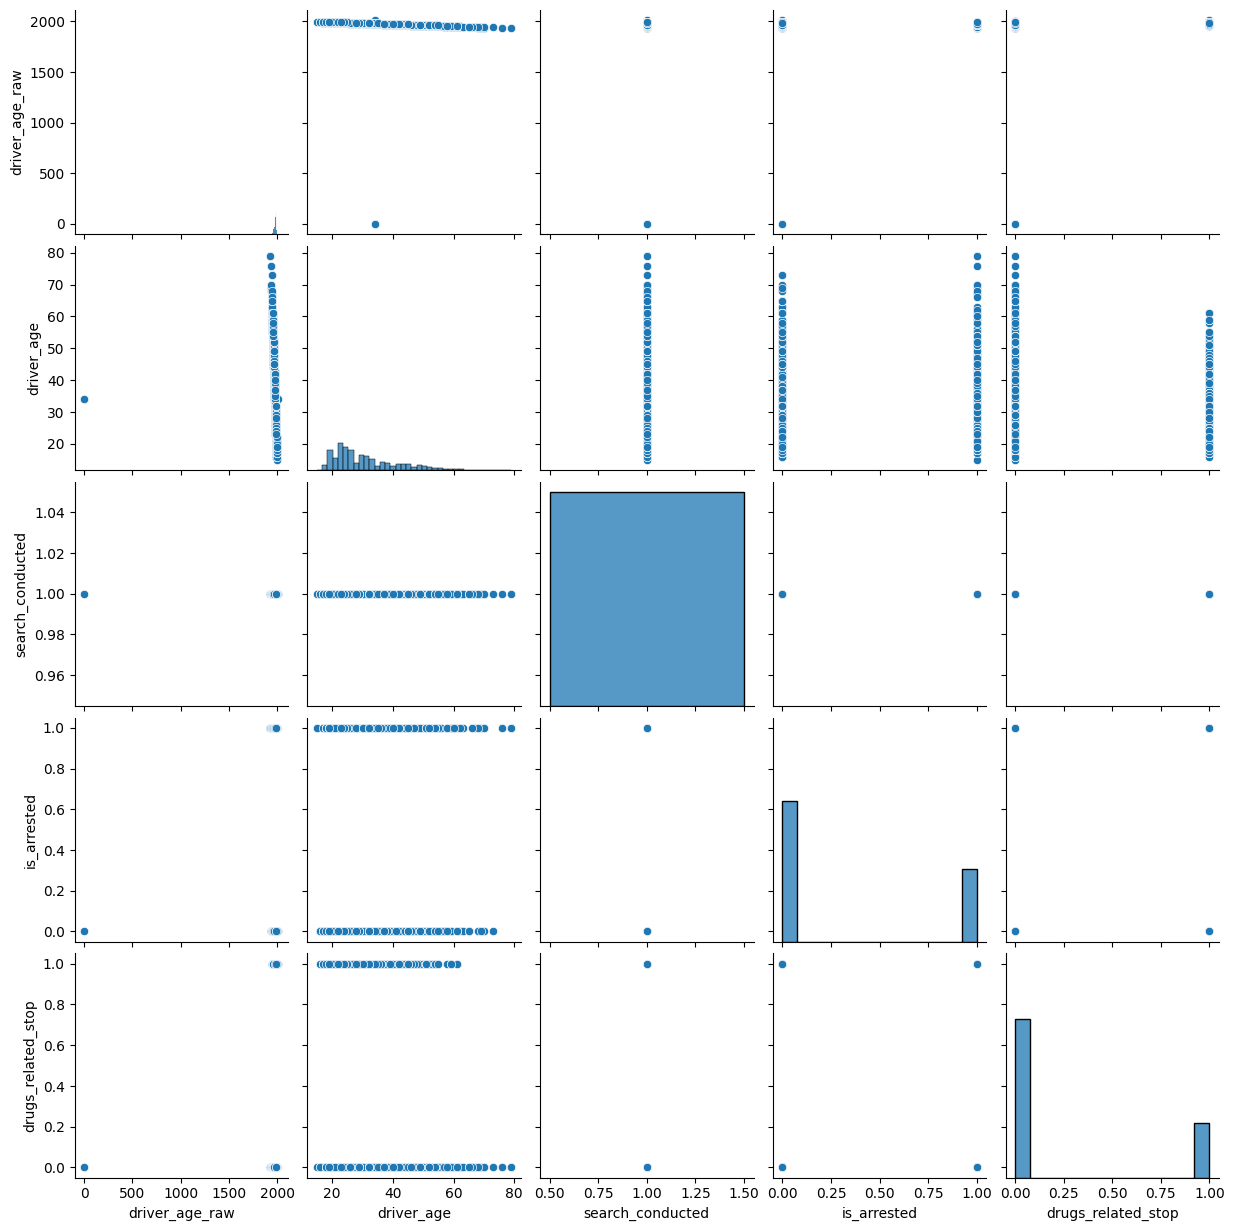

In [216]:
sns.pairplot(data)